## **Compurter Vision Lab 06: Feature Detection and Description (Detectors & Descriptors)**
### **Name:** Waleed Usman [F22607011]


### 1. Importing Required Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

We import the necessary libraries:
- `cv2` for computer vision tasks
- `numpy` for numerical computations
- `matplotlib.pyplot` for displaying images inline in Colab

###  ======== Utility Function ========

In [18]:
def resize_image(img, size=(600, 400)):
    return cv2.resize(img, size)

- `resize_image(img, size)`: Resizes all images to a uniform size.
- `show_with_matplotlib(title, img, is_gray)`: Displays images using Matplotlib with an optional grayscale toggle.


In [31]:
def show_with_matplotlib(title, img, is_gray=False):
    plt.figure(figsize=(8, 6))
    plt.title(title)
    if is_gray:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

In [20]:
# ======== Load and Resize Images ========
img_box1 = resize_image(cv2.imread('/content/box_1.jfif'))
img_box2 = resize_image(cv2.imread('/content/box_2.jfif'))
img_building1 = resize_image(cv2.imread('/content/building-1.jpg'))
img_building2 = resize_image(cv2.imread('/content/building_2.webp'))

In [22]:
gray_box1 = cv2.cvtColor(img_box1, cv2.COLOR_BGR2GRAY)
gray_box2 = cv2.cvtColor(img_box2, cv2.COLOR_BGR2GRAY)
gray_building1 = cv2.cvtColor(img_building1, cv2.COLOR_BGR2GRAY)
gray_building2 = cv2.cvtColor(img_building2, cv2.COLOR_BGR2GRAY)

- Load all four images from disk using `cv2.imread()`.
- Resize them using the `resize_image()` function.
- Convert each image to grayscale using `cv2.cvtColor()` to prepare for feature detection.


### ======== Harris Corner Detector ========

In [23]:
def harris_corner(img, gray):
    harris = cv2.cornerHarris(np.float32(gray), 2, 3, 0.04)
    harris = cv2.dilate(harris, None)
    img_harris = img.copy()
    img_harris[harris > 0.01 * harris.max()] = [0, 0, 255] # Threshold: only keep strong corners
    return img_harris

- Detects corners based on gradient change.
- `cv2.cornerHarris()` is used for detection.
- The result is dilated for better visibility.
- Strong corner responses are marked in **red** on the original image.

### ======== SIFT Keypoints ========

In [24]:
def sift_features(img, gray):
    sift = cv2.SIFT_create()
    kp, des = sift.detectAndCompute(gray, None) #Detects keypoints and descriptors
    img_sift = cv2.drawKeypoints(img, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) # it draws rich, detailed visual representations of keypoints.
    return img_sift, kp, des

- SIFT is a **scale- and rotation-invariant** detector and descriptor.
- We use `cv2.SIFT_create()` to create a SIFT object.
- `detectAndCompute()` returns keypoints and descriptors.
- Keypoints are drawn using `cv2.drawKeypoints()` with the `DRAW_RICH_KEYPOINTS` flag to show size and orientation.


### ======== ORB Keypoints ========

In [52]:
def orb_features(img, gray):
    orb = cv2.ORB_create()
    kp, des = orb.detectAndCompute(gray, None)
    img_orb = cv2.drawKeypoints(img, kp, None, color=(0, 255, 0), flags=0)
    return img_orb, kp, des

- ORB is a fast and patent-free alternative to SIFT/SURF.
- Combines **FAST** keypoint detector and **BRIEF** descriptor.
- Uses `cv2.ORB_create()` for detection and description.
- Keypoints are drawn in **green**.

### ======== ORB Feature Matching ========

In [54]:
def orb_match(img1, img2, kp1, des1, kp2, des2):
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key=lambda x: x.distance)
    matched_img = cv2.drawMatches(img1, kp1, img2, kp2, matches[:20], None, flags=2)
    return matched_img

- Use ORB descriptors to match features between:
  - `box.png` vs `box_in_scene.png`
  - `building.jpg` vs `building2.jpg`
- Matching done using `cv2.BFMatcher` with Hamming distance and `crossCheck=True`.
- Matches are sorted and top 20 are drawn using `cv2.drawMatches()`.

### ======== Apply on All Images ========

#### --- Box Images ---

In [55]:
harris_box1 = harris_corner(img_box1, gray_box1)
sift_box1, kp_sift_box1, des_sift_box1 = sift_features(img_box1, gray_box1)
orb_box1, kp_orb_box1, des_orb_box1 = orb_features(img_box1, gray_box1)

harris_box2 = harris_corner(img_box2, gray_box2)
sift_box2, kp_sift_box2, des_sift_box2 = sift_features(img_box2, gray_box2)
orb_box2, kp_orb_box2, des_orb_box2 = orb_features(img_box2, gray_box2)

### --- Building Images ---

In [57]:
harris_building1 = harris_corner(img_building1, gray_building1)
sift_building1, kp_sift_building1, des_sift_building1 = sift_features(img_building1, gray_building1)
orb_building1, kp_orb_building1, des_orb_building1 = orb_features(img_building1, gray_building1)

harris_building2 = harris_corner(img_building2, gray_building2)
sift_building2, kp_sift_building2, des_sift_building2 = sift_features(img_building2, gray_building2)
orb_building2, kp_orb_building2, des_orb_building2 = orb_features(img_building2, gray_building2)

### ======== Match Boxes & Buildings ========

In [58]:
match_boxes = orb_match(img_box1, img_box2, kp_orb_box1, des_orb_box1, kp_orb_box2, des_orb_box2)
match_buildings = orb_match(img_building1, img_building2, kp_orb_building1, des_orb_building1, kp_orb_building2, des_orb_building2)

We apply:
- Harris, SIFT, and ORB on each of the four images.
- Each result is visualized using Matplotlib.

### ======== Display Results =======

#### Box Images

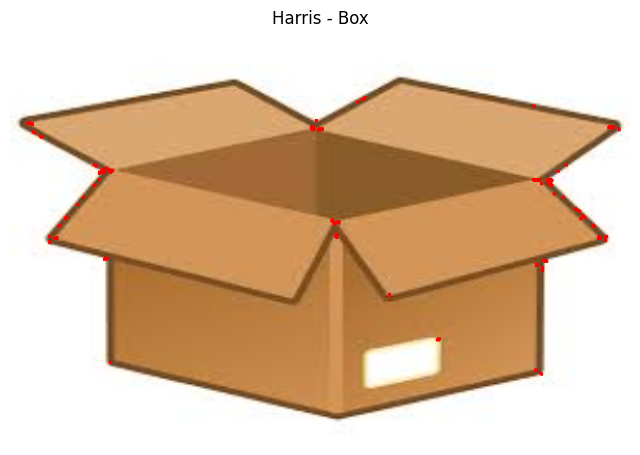

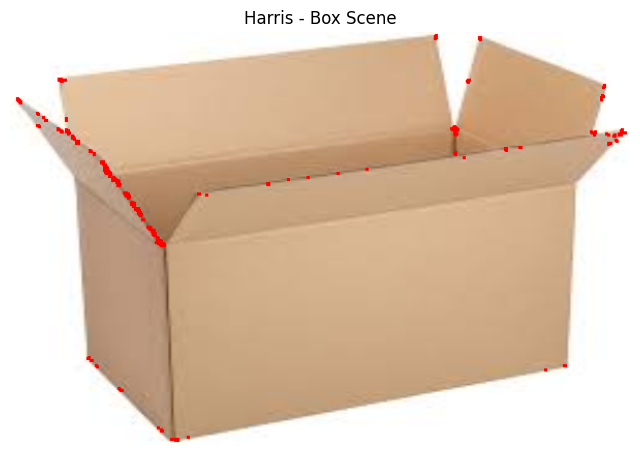

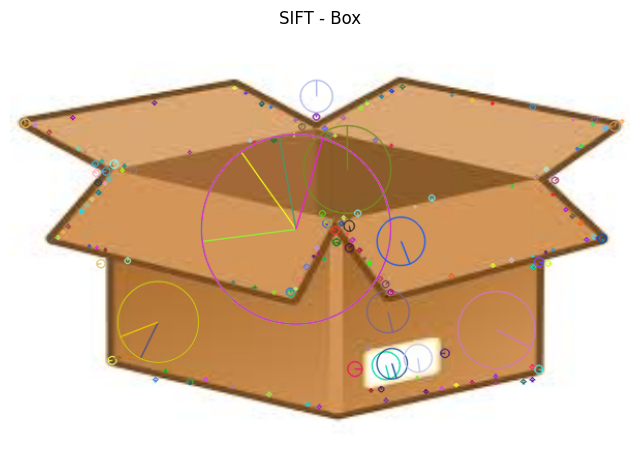

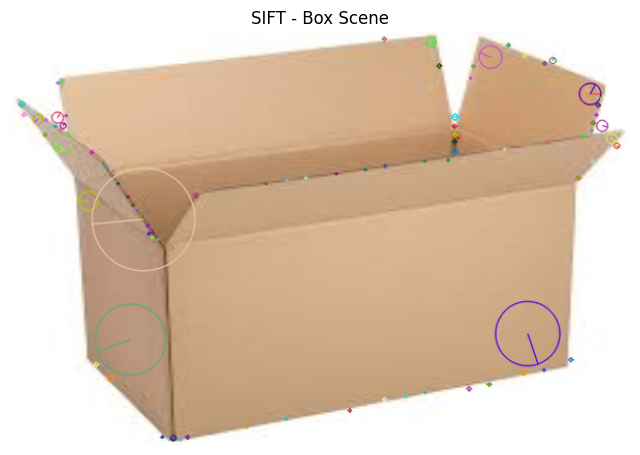

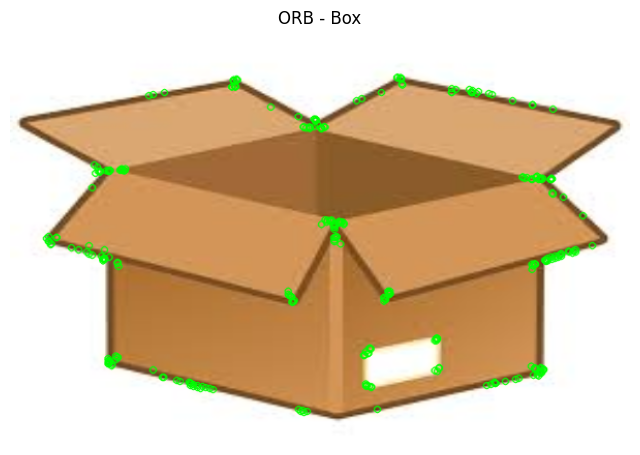

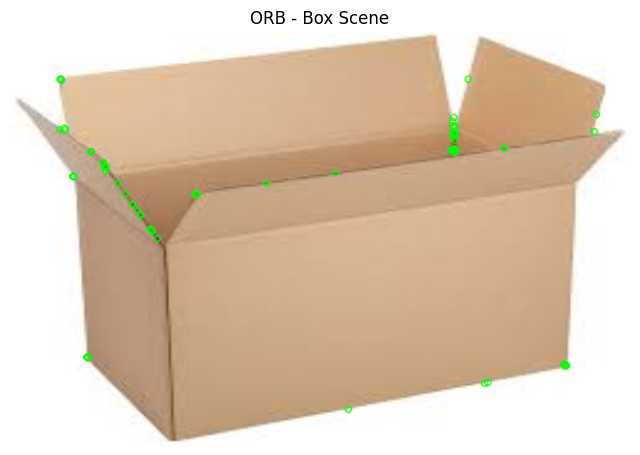

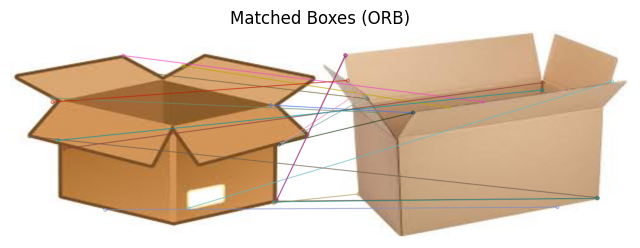

In [59]:
show_with_matplotlib("Harris - Box", harris_box1)
show_with_matplotlib("Harris - Box Scene", harris_box2)
show_with_matplotlib("SIFT - Box", sift_box1)
show_with_matplotlib("SIFT - Box Scene", sift_box2)
show_with_matplotlib("ORB - Box", orb_box1)
show_with_matplotlib("ORB - Box Scene", orb_box2)
show_with_matplotlib("Matched Boxes (ORB)", match_boxes)

#### Building Images

In [44]:
show_with_matplotlib("Harris - Building", harris_building1)
show_with_matplotlib("Harris - Building 2", harris_building2)
show_with_matplotlib("SIFT - Building", sift_building1)
show_with_matplotlib("SIFT - Building 2", sift_building2)
show_with_matplotlib("ORB - Building", orb_building1)
show_with_matplotlib("ORB - Building 2", orb_building2)
show_with_matplotlib("Matched Buildings (ORB)", match_buildings)

Output hidden; open in https://colab.research.google.com to view.

- All visual outputs are displayed in Colab using Matplotlib.
- No OpenCV `imshow()` is used to ensure compatibility.

### Results & Comparison
- Visually compare:
  - Harris, SIFT, ORB outputs on all images
  - Feature matching between box scenes and building scenes
- Observe how many keypoints are detected and how well they match.

You can now analyze the keypoints, match quality, and choose the best feature detector for your specific use case!
